# Speech Emotion Recognition using Librosa


#### CREMA Dataset


In [1]:
#Check where your Dataset Zip File is
!ls '/Users/wangyun/Documents/GitHub/metaAudio/Dataset/'

Crema.zip   Ravdess.zip Savee.zip


In [2]:
import os
from zipfile import ZipFile
import numpy as np
import librosa

OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
import glob
dataset_list=glob.glob(r'./Dataset/*.zip')
Zip_file_path = dataset_list[1]

with ZipFile(Zip_file_path, 'r') as zip:
    Name_list = np.array(zip.namelist())
    files = Name_list[[x.endswith(".wav") for x in Name_list]]
    print(files)
# files=files[:10]
a=files[1]
def pickle_load_zip(file):
    with ZipFile(Zip_file_path, 'r').open(file) as f:
        sample,sr=librosa.load(f)
        print(sample.shape[0]/sr)
    return sample,sr
sample,sr=pickle_load_zip(a)
print(sample.shape)
print(sr)


['1001_DFA_ANG_XX.wav' '1001_DFA_DIS_XX.wav' '1001_DFA_FEA_XX.wav' ...
 '1091_WSI_HAP_XX.wav' '1091_WSI_NEU_XX.wav' '1091_WSI_SAD_XX.wav']
2.3356916099773244
(51502,)
22050


In [7]:
len(files)/2

3721.0

In [64]:
def get_min_max(files:list):
    min_,max_ = 100,0
    for file in files:
        with ZipFile(Zip_file_path, 'r').open(file) as f:
            sound_file,sr=librosa.load(f)
            t = sound_file.shape[0]/sr
            if t < min_:
                min_ = t
            elif t > max_:
                max_ = t
                max_sf=file
    return min_,max_,max_sf

        
min_,max_,max_sf=get_min_max(files)
print(min_)
print(max_)
print(max_sf)

1.8685260770975056
2.635963718820862
1001_IEO_ANG_MD.wav


In [65]:
emotions = {
    'NEU':'neutral',
    'HAP':'happy',
    'SAD':'sad',
    'ANG':'angry',
    'FEA':'fearful',
    'DIS':'disgust',
}

#Emotions we want to observe
observed_emotions = ['neutral', 'happy', 'fearful', 'disgust']
for file in files:
    file_name = os.path.basename(file)
    label = file_name.split('_')[2]
    print(label)
    # features = extract_features(file,max_)

ANG
DIS
FEA
HAP
NEU
SAD
ANG
ANG
ANG
DIS


In [66]:
files # 1001_IEO_ANG_MD.wav

array(['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav',
       '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav',
       '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav',
       '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav',
       '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav'], dtype='<U19')

In [121]:
a=files[1]
with ZipFile(Zip_file_path, 'r').open(a) as f:
    sound_file,sr=librosa.load(f)
max_x = sound_file.shape[0] / sr
print(max_)
print(max_x)

2.635963718820862
2.3356916099773244


In [122]:
length=max_ * sr - sound_file.shape[0]
sound_file=np.pad(sound_file,(0,int(length)),'constant') # add padding of int(lenth) in the end of the vector
sound_file

array([0.00083834, 0.00131607, 0.0014448 , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [123]:
FRAME_SIZE = 256
HOP_LENGTH = 128
stft = np.abs(librosa.stft(sound_file, n_fft=FRAME_SIZE,hop_length=HOP_LENGTH))
pitches, magnitudes = librosa.piptrack(y=sound_file, sr=sr, S=stft)
# pitches are the interpolated frequency estimate of a particular harmonic
# the corresponding value in the "magnitudes" array gives the energy of the peak
# values are corresponded in these two arrays (if one is zero, the other is zero)
print(pitches.shape) # (frequency bins, frames)
print(magnitudes.shape)

(129, 455)
(129, 455)


In [124]:
pitch_tuning_offset = librosa.pitch_tuning(pitches)
pitch_tuning_offset

-0.31

In [125]:
pitch=[]
for i in range(magnitudes.shape[1]):
    index = magnitudes[:, i].argmax() # max magnitude (energy) per frame 
    pitch.append(pitches[index, i]) # select the pitch of the largest energy

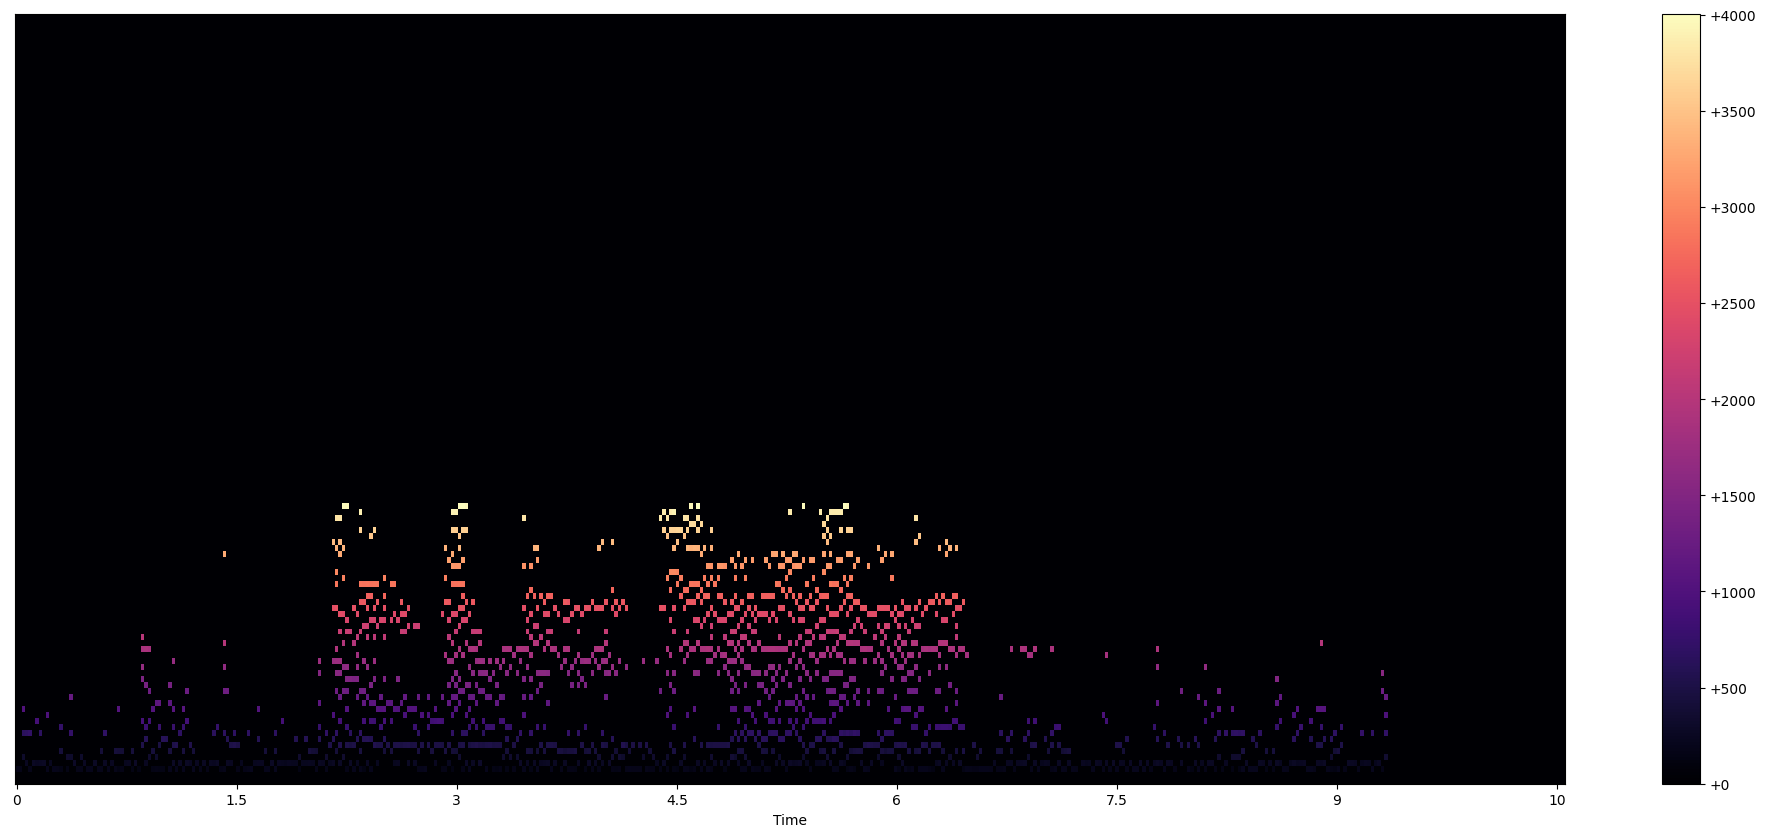

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
librosa.display.specshow(pitches,
                        sr=sr,
                        x_axis="time")
plt.colorbar(format="%+2.f")
plt.show()

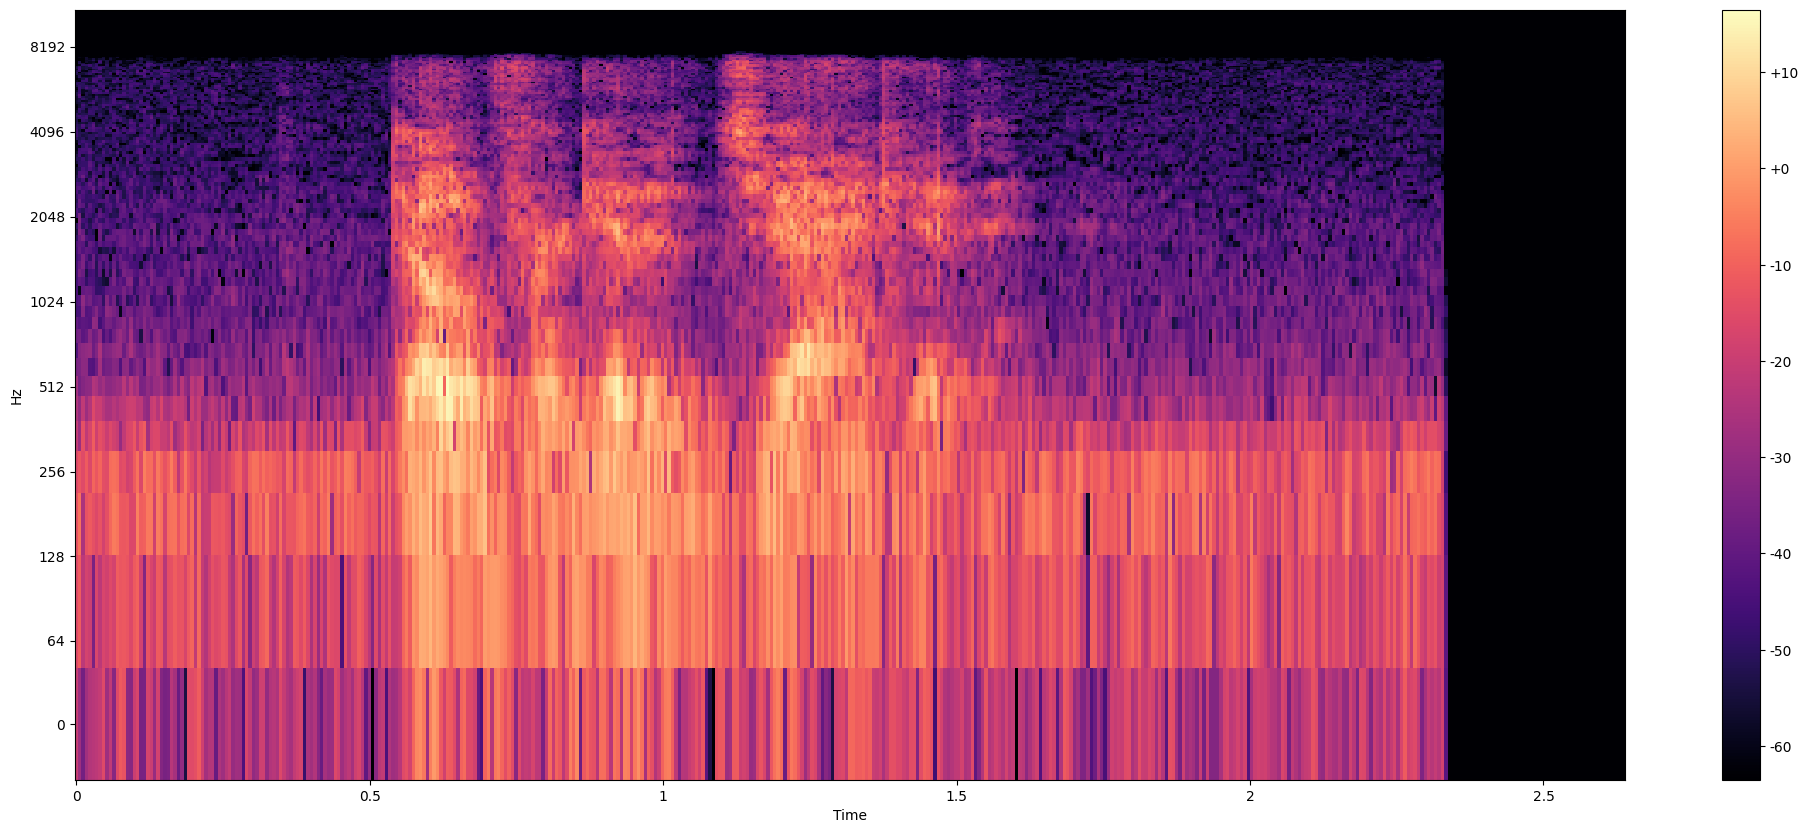

In [127]:
# Extracting spectrograms from Audio with python

stft = librosa.stft(sound_file,n_fft=FRAME_SIZE, hop_length = HOP_LENGTH)


Y_sound_file = np.abs(stft)**2 

def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
  plt.figure(figsize=(25,10))
  librosa.display.specshow(Y,
                           sr=sr,
                           hop_length=hop_length,
                           x_axis="time",
                           y_axis=y_axis)
  plt.colorbar(format="%+2.f")

Y_log_sound_file = librosa.power_to_db(Y_sound_file) # convert amplitude to decibel (a logarithmic unit used to measure sound level)

plot_spectrogram(Y_log_sound_file,sr,HOP_LENGTH,y_axis="log")



In [72]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
sample.shape[0]/sr

2.5

In [37]:
# what is fft?
# signal and ft and magnitude all have the same shape
import scipy as sp
signal,sr=librosa.load(file)
print(signal.shape)
print(sr)

ft = sp.fft.fft(signal)
print(ft.shape)
print(ft)

magnitude = np.absolute(ft)
print(magnitude.shape)
print(magnitude)

frequency = np.linspace(0,sr,len(magnitude)) # 返回len(magnitude)均匀分布的样本
print(frequency.shape)

(64009,)
22050
(64009,)
[-1.4142983-0.j          0.922574 -0.01009183j  0.8508521-0.09890687j ...
  0.835572 -0.106388j    0.8508521+0.09890687j  0.922574 +0.01009183j]
(64009,)
[1.4142983  0.9226292  0.85658145 ... 0.84231764 0.85658145 0.9226292 ]
(64009,)


In [10]:
happy,sr=librosa.load(file)
print(happy.size) # samples
print(sr)
sample_duration = 1/sr
print(f'Duration of 1 sample is: {sample_duration: .6f} seconds')

# duration of the audio signal in seconds
duration = sample_duration * len(happy)
print(f'Duration of signal is: {duration: .2f} seconds')

55181
22050
Duration of 1 sample is:  0.000045 seconds
Duration of signal is:  2.50 seconds


(-0.25, 0.25)

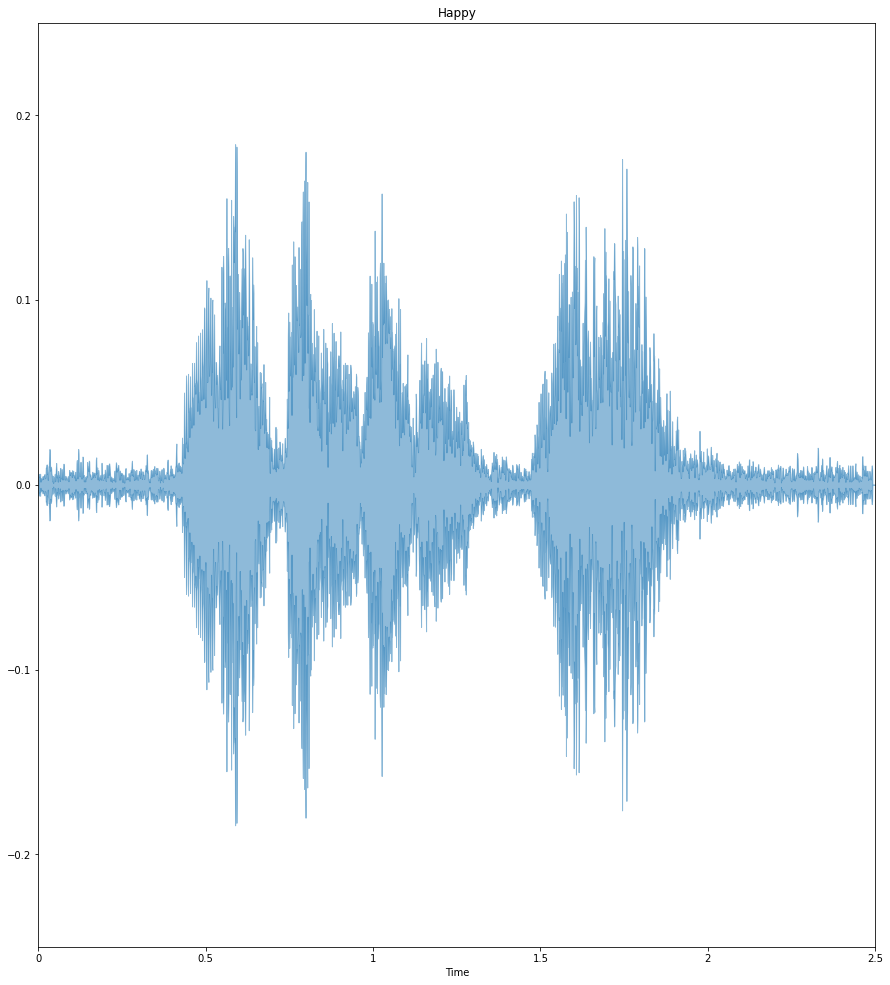

In [11]:
# visualize the waveforms
plt.figure(figsize=(15,17))
plt.subplot(1,1,1)
librosa.display.waveplot(happy,alpha=0.5)
plt.title("Happy")
plt.ylim(-0.25,0.25)

In [12]:
FRAME_SIZE = 256 # bigger frame_size -> smaller len(AE)
HOP_LENGTH = 128
def AE(signal, frame_size,hop_length): # with overlapping
  AE = []
  for i in range(0,len(signal),hop_length):
    current_frame_AE = max(signal[i:(i+frame_size)])
    AE.append(current_frame_AE)
  return np.array(AE)
AE_happy = AE(happy,FRAME_SIZE,HOP_LENGTH)
print(len(AE_happy))

def fancy_AE(signal, frame_size,hop_length): # with overlapping
  return np.array([max(signal[i:i+frame_size]) for i in range(0,signal.size,hop_length)])
fancy_AE_happy = fancy_AE(happy,FRAME_SIZE,HOP_LENGTH)
print(len(fancy_AE_happy))


432
432


(-0.25, 0.25)

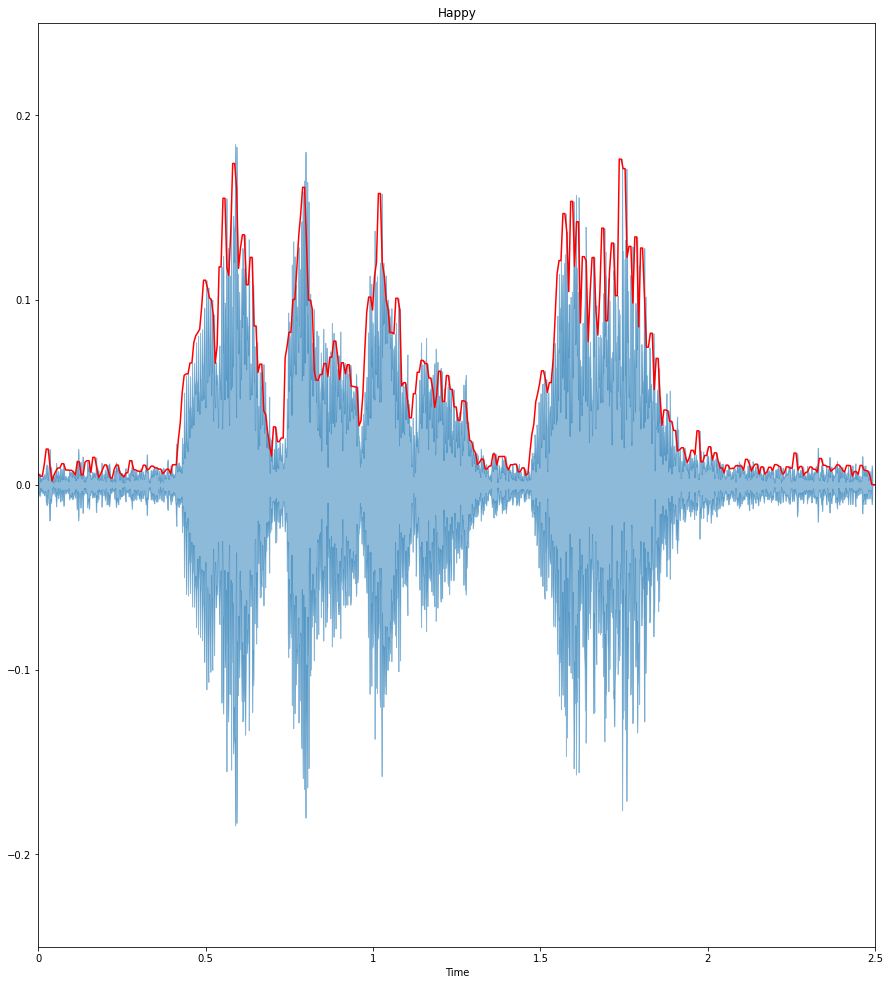

In [13]:
# visualize amplitude envelop for the audio file
frames = range(0,AE_happy.size)
t = librosa.frames_to_time(frames,hop_length=HOP_LENGTH)

plt.figure(figsize=(15,17))
plt.subplot(1,1,1)
librosa.display.waveplot(happy,alpha=0.5)
plt.plot(t,AE_happy,color='r')
plt.title("Happy")
plt.ylim(-0.25,0.25)


(432,)


(-0.25, 0.25)

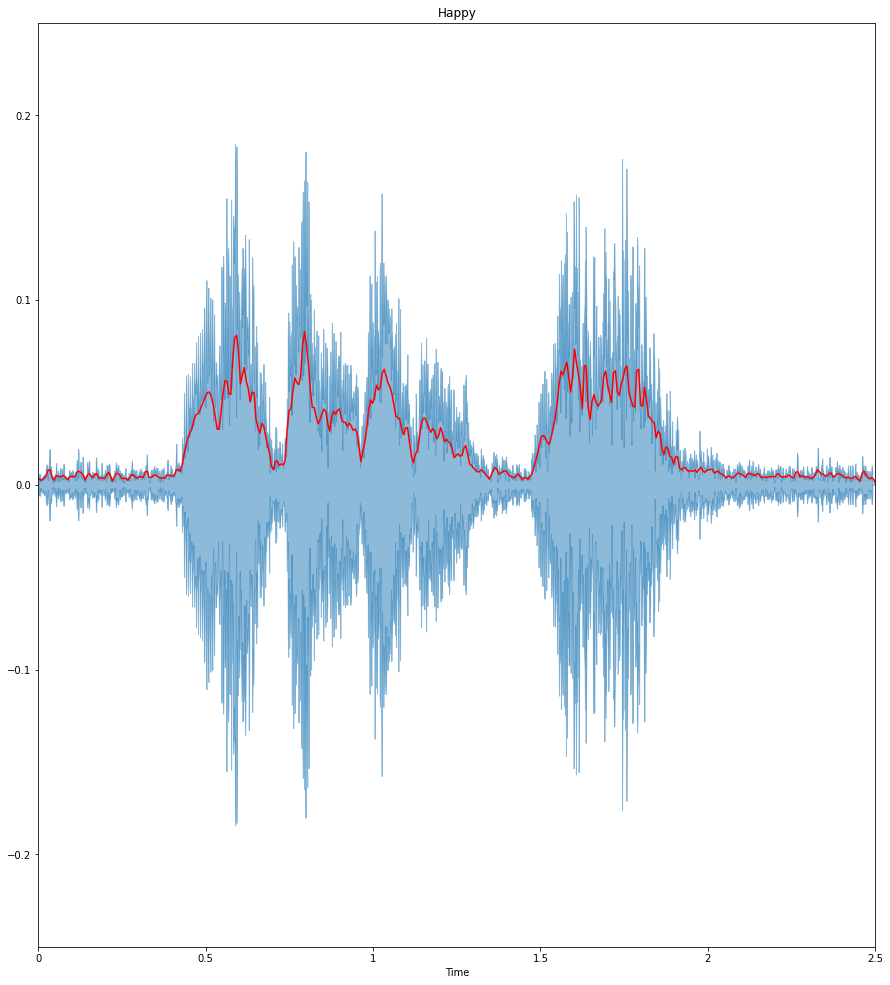

In [14]:
# Extract RMS and visualize it
FRAME_SIZE = 256 # bigger frame_size -> smaller len(AE)
HOP_LENGTH = 128
rms_happy = librosa.feature.rms(happy,frame_length=FRAME_SIZE,hop_length=HOP_LENGTH)[0]
print(rms_happy.shape)

frames = range(0,rms_happy.size)
t = librosa.frames_to_time(frames,hop_length=HOP_LENGTH)

plt.figure(figsize=(15,17))
plt.subplot(1,1,1)
librosa.display.waveplot(happy,alpha=0.5)
plt.plot(t,rms_happy,color='r')
plt.title("Happy")
plt.ylim(-0.25,0.25)

# way less variability and outliers compared to AE 
# because RMS considers all the samples in a frame instead of the max

(432,)


(0.0, 100.0)

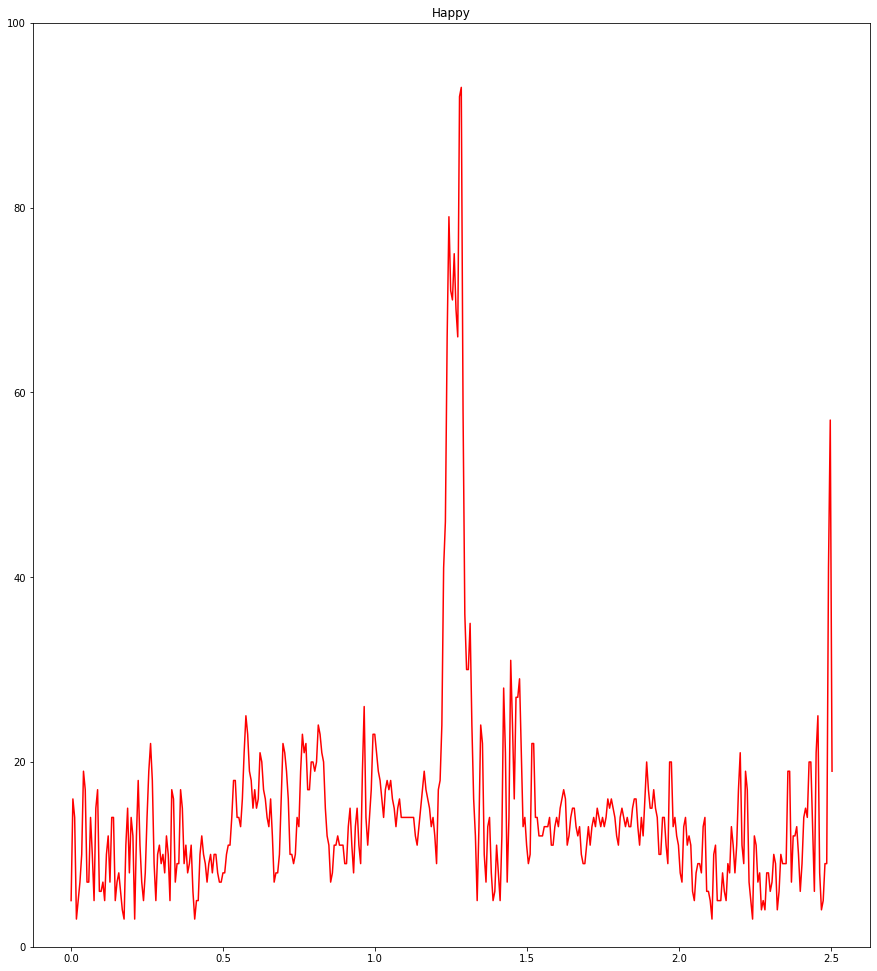

In [15]:
# Extract Zero-crossing rate (ZCR) and visualize it
FRAME_SIZE = 256 # bigger frame_size -> smaller len(AE)
HOP_LENGTH = 128
zcr_happy = librosa.feature.zero_crossing_rate(happy,frame_length=FRAME_SIZE,hop_length=HOP_LENGTH)[0]
print(zcr_happy.shape)

frames = range(0,zcr_happy.size)
t = librosa.frames_to_time(frames,hop_length=HOP_LENGTH)

plt.figure(figsize=(15,17))
plt.subplot(1,1,1)
# librosa.display.waveplot(happy,alpha=0.5)
plt.plot(t,zcr_happy*FRAME_SIZE,color='r') # absolute number of zero crossing rate using zcr_happy*FRAME_SIZE. If using zcr_happy, then normalized
plt.title("Happy")
plt.ylim(0,100)

# way less variability and outliers compared to AE 
# because RMS considers all the samples in a frame instead of the max

# usually white noise has ZCR steafily higher than voice, 
# but voice has peaks highers than white noices

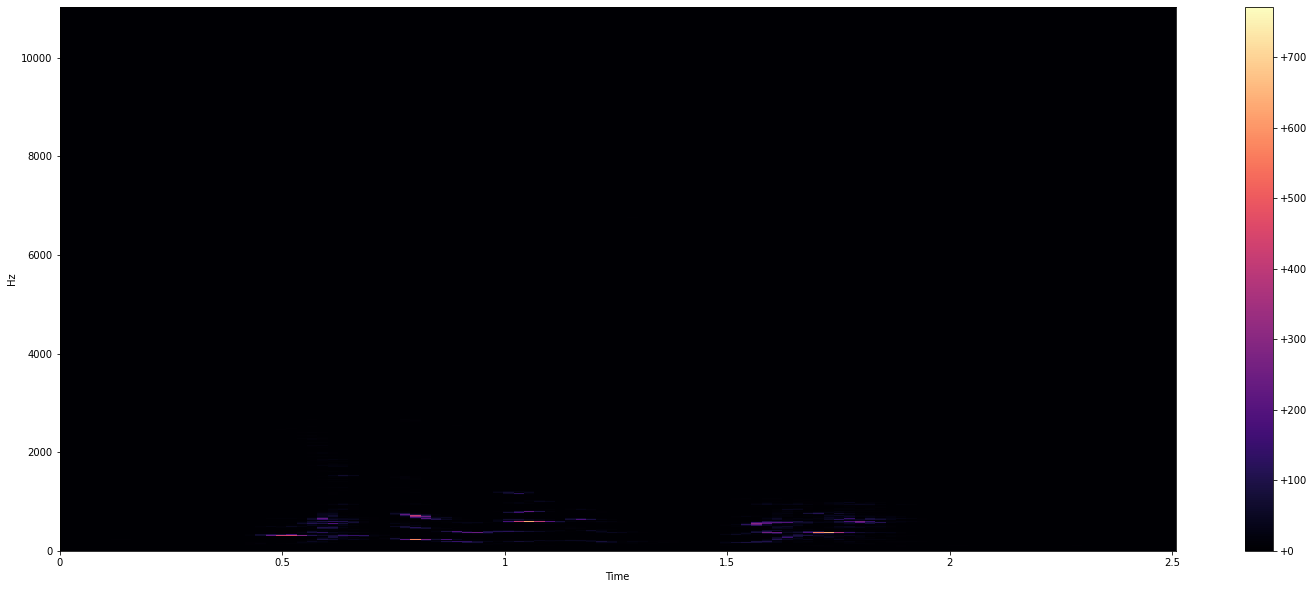

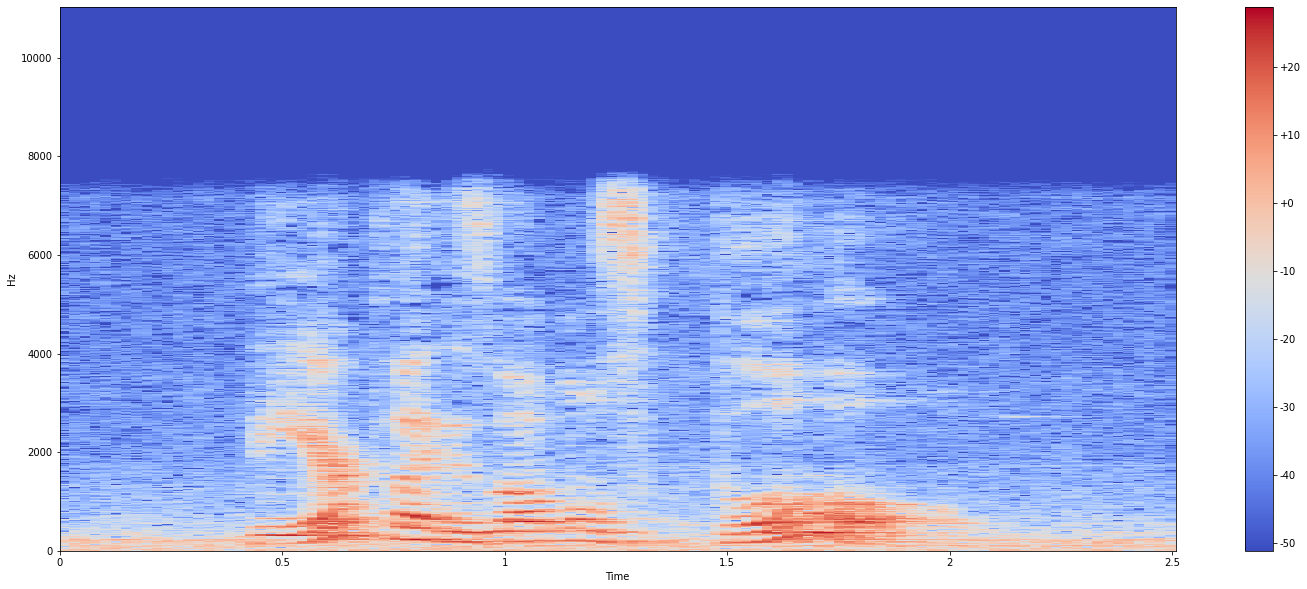

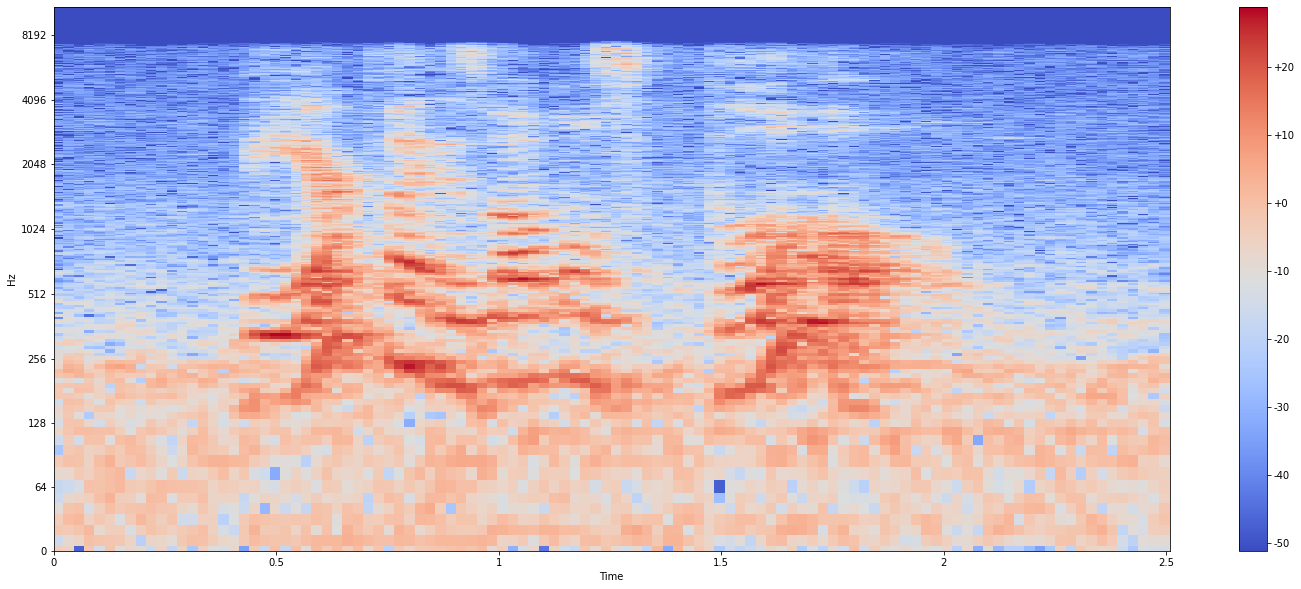

In [16]:
# Extracting spectrograms from Audio with python
FRAME_SIZE = 2048 # bigger frame_size -> smaller len(AE)
HOP_SIZE = 512
S_happy = librosa.stft(happy,n_fft=FRAME_SIZE, hop_length = HOP_SIZE)

# np.abs(A) is its amplitude spectrum  
# np.abs(A)**2 is its power spectrum
# The phase spectrum is obtained by np.angle(A)
Y_happy = np.abs(S_happy)**2 

def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
  plt.figure(figsize=(25,10))
  librosa.display.specshow(Y,
                           sr=sr,
                           hop_length=hop_length,
                           x_axis="time",
                           y_axis=y_axis)
  plt.colorbar(format="%+2.f")
plot_spectrogram(Y_happy,sr,HOP_SIZE)

# why all black? because y_axis is not linear, conceptualy it should be transformed into log_scale
# Log-Amplitude Spectrogram
Y_log_happy = librosa.power_to_db(Y_happy) # convert amplitude to decibel (a logarithmic unit used to measure sound level)
plot_spectrogram(Y_log_happy,sr,HOP_SIZE) # can visualize some energy of sound

# Log-Frequency Spectrogram
# however now, on frequency side, everything is squashed because we use linear frequency representation
# But the way we preceive frequency is a logarithmic, we have way better resolution at lower frequencies
plot_spectrogram(Y_log_happy,sr,HOP_SIZE,y_axis="log")



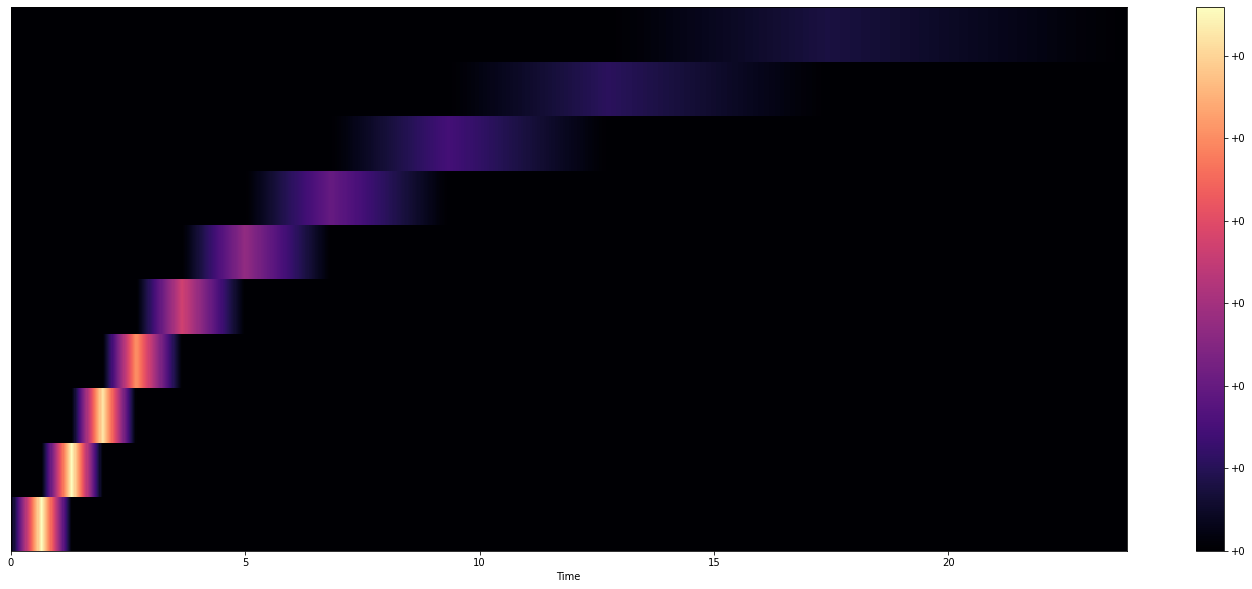

In [17]:
# Extract Mel Spectrograms
filter_banks = librosa.filters.mel(n_fft=2048,sr=sr,n_mels=10)
filter_banks.shape # M = (number of mel bands, framesize/2 + 1) 1025=(2048/2)+1

plt.figure(figsize=(25,10))
librosa.display.specshow(filter_banks,
                         sr=sr,
                         x_axis="time")
plt.colorbar(format="%+2.f")
plt.show() # another illustration for Mel filter banks. 高亮是center, triangular filter

(10, 108)


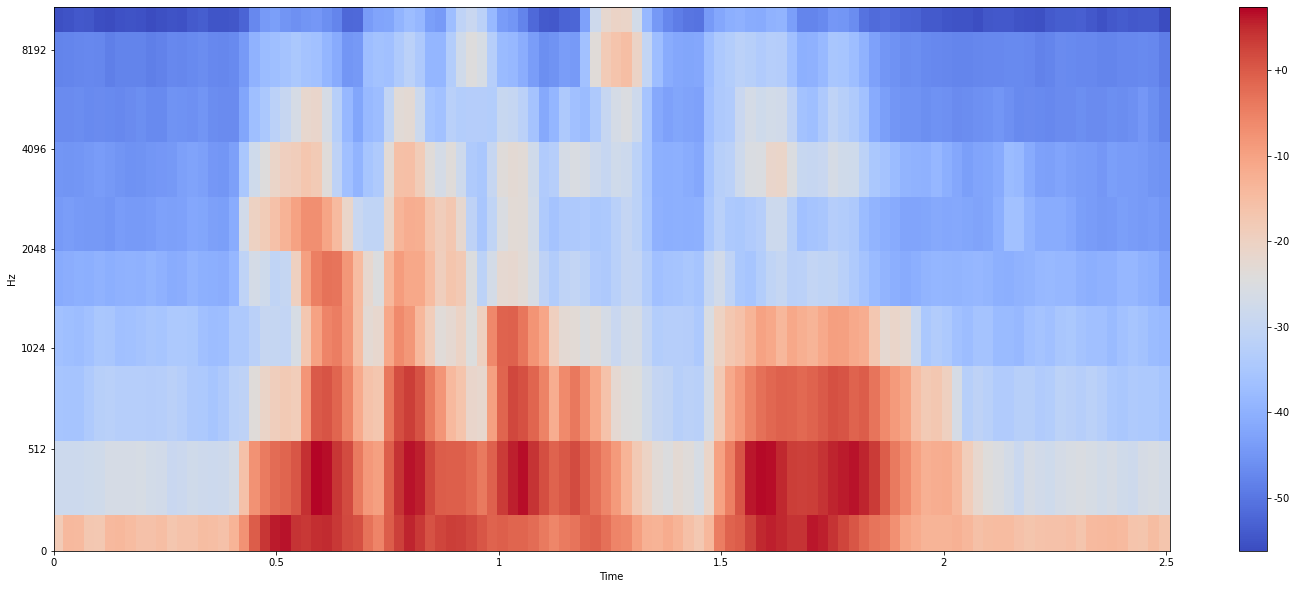

In [18]:
# Extract Mel Spectrograms [cont.]
mel_spectrogram = librosa.feature.melspectrogram(happy,sr=sr,n_fft=2048,hop_length=512,n_mels=10) # n_mels 是y轴的number of block
print(mel_spectrogram.shape) # Mel spectrogram = (n_mels, frames)

log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram,
                         sr=sr,
                         x_axis="time",
                         y_axis="mel")
plt.colorbar(format="%+2.f")
plt.show()



(13, 108)


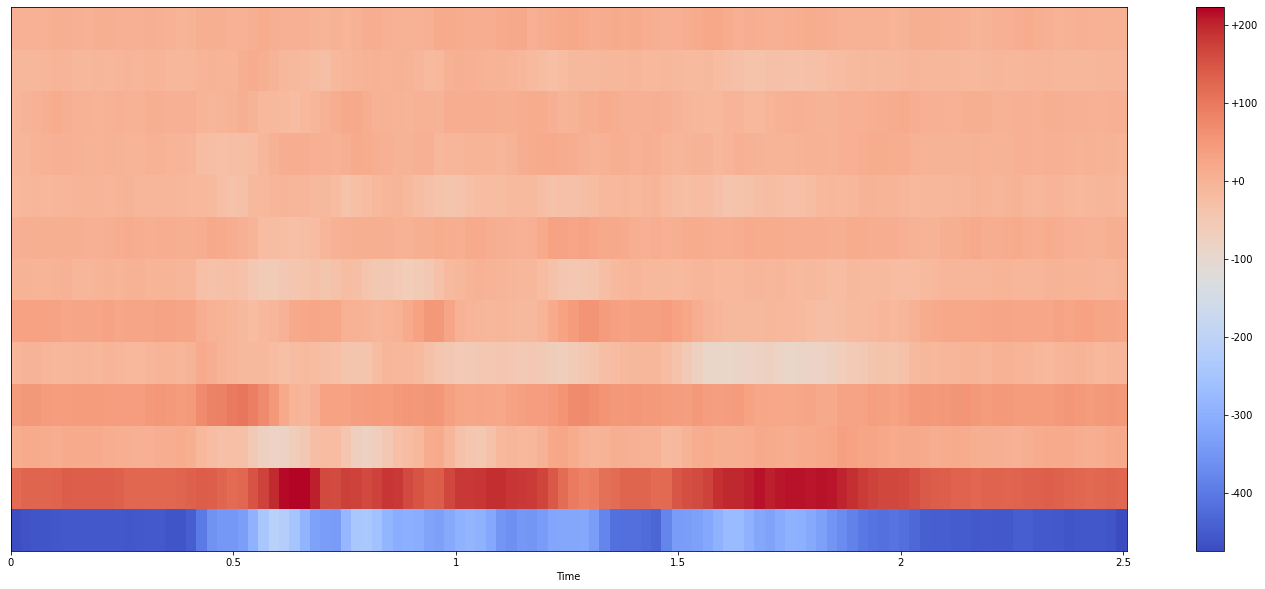

In [20]:
# Extract MFCC
mfccs = librosa.feature.mfcc(happy, n_mfcc=13,sr=sr)
print(mfccs.shape)

plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs,
                         sr=sr,
                         x_axis="time")
plt.colorbar(format="%+2.f")
plt.show()

(13, 108)
(13, 108)


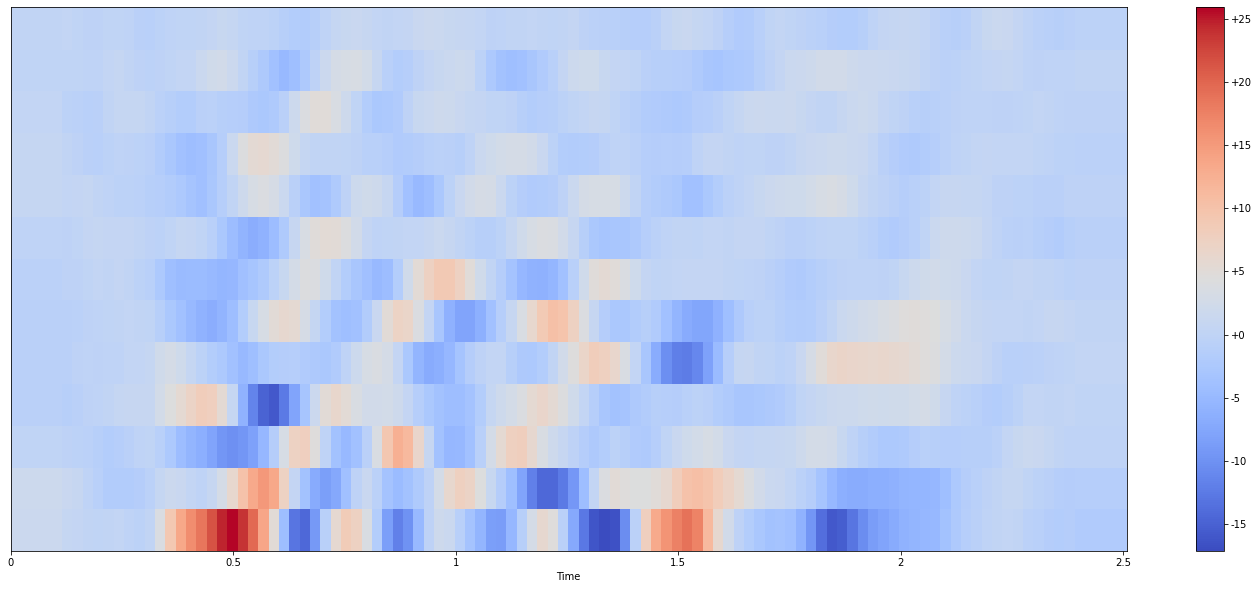

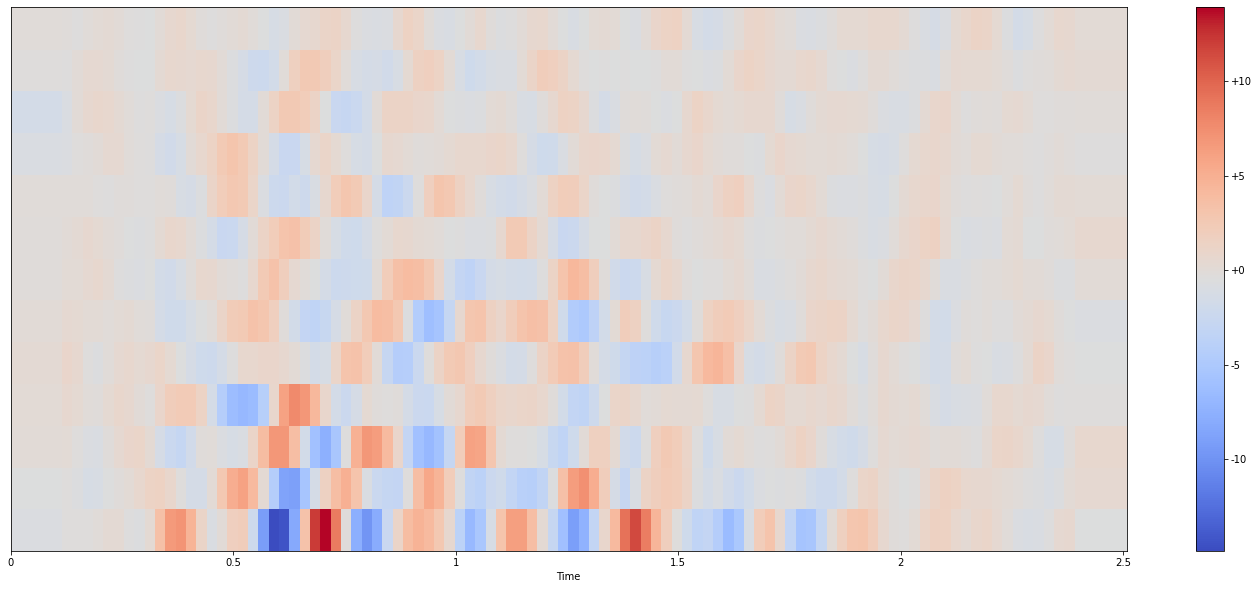

(39, 108)


In [29]:
# Calculate delta and delta2 MFCCs
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs,order=2)
print(delta_mfccs.shape)
print(delta2_mfccs.shape)
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfccs,
                         sr=sr,
                         x_axis="time")
plt.colorbar(format="%+2.f")
plt.show()

plt.figure(figsize=(25,10))
librosa.display.specshow(delta2_mfccs,
                         sr=sr,
                         x_axis="time")
plt.colorbar(format="%+2.f")
plt.show()

# To utilize all mfcc info
comprehensive_mfccs=np.concatenate((mfccs,delta_mfccs,delta2_mfccs))
print(comprehensive_mfccs.shape)

(55181,)
(55917,)
(64009,)
(108,)
(110,)
(126,)


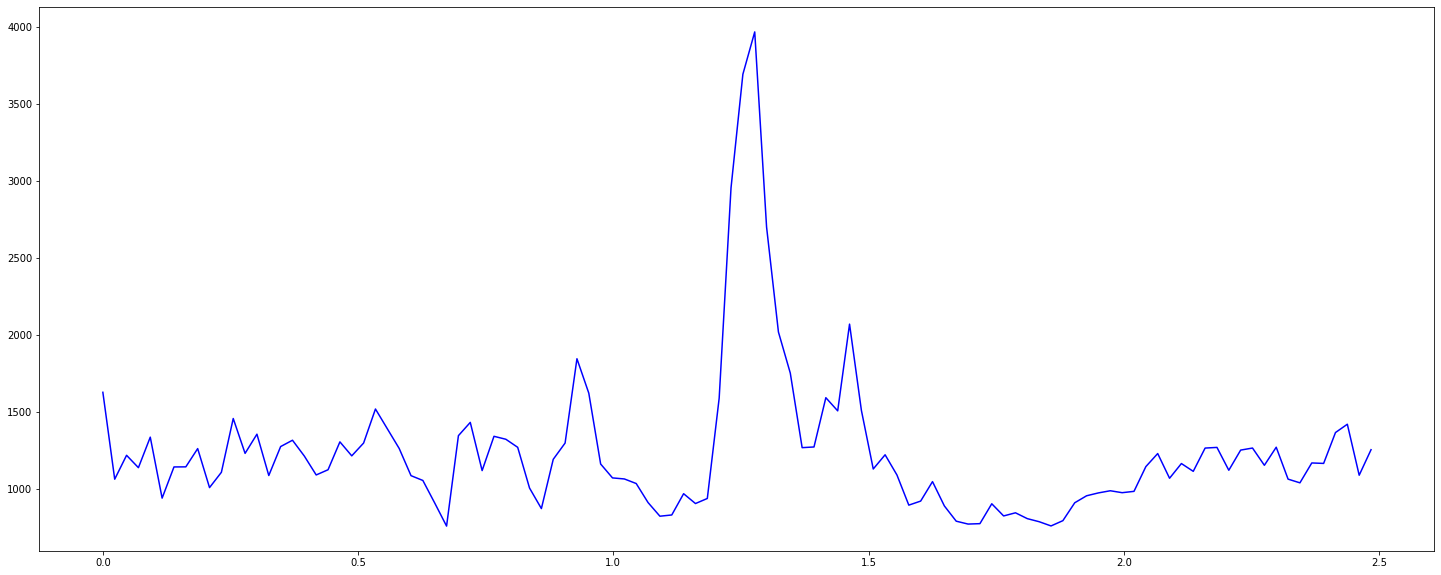

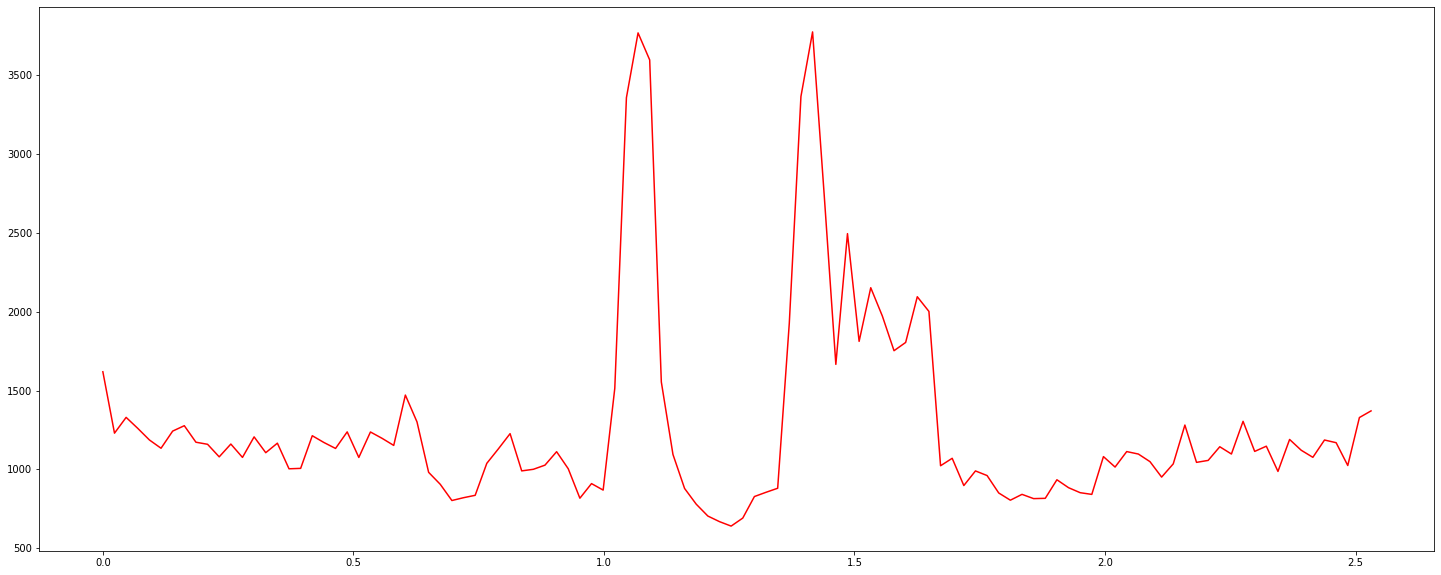

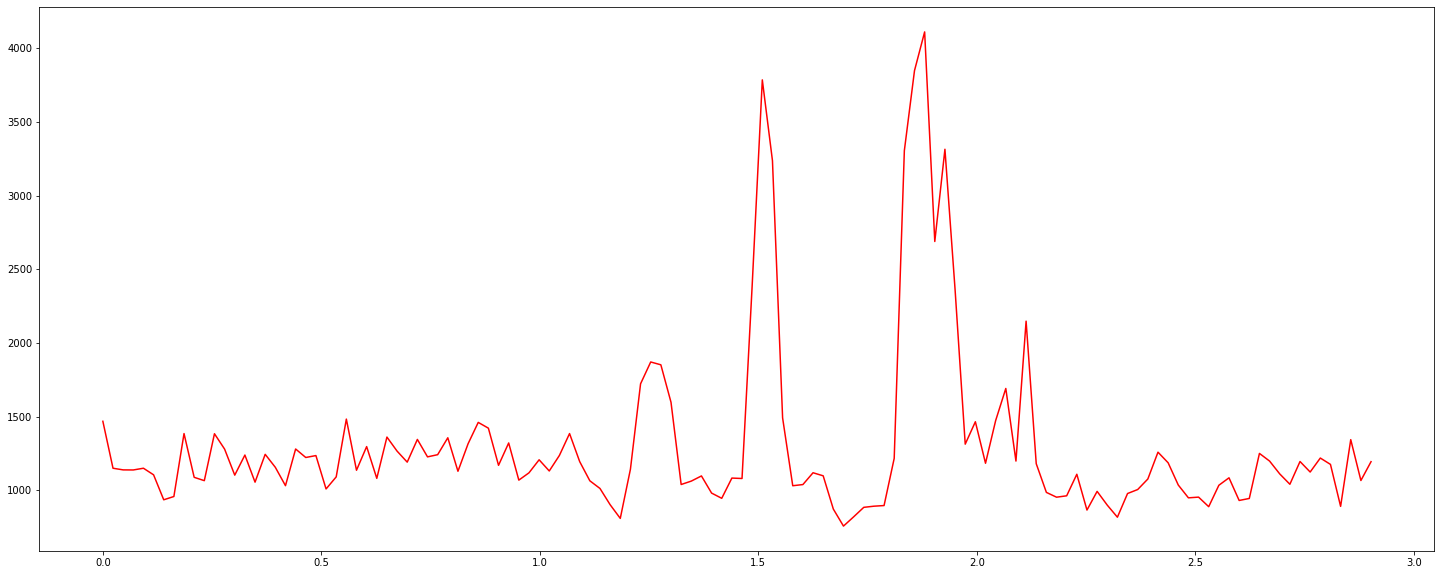

In [41]:
happy_file = "/content/1061_TAI_HAP_XX.wav"
sad_file = "/content/1061_TAI_SAD_XX.wav"
fear_file = "/content/1061_TAI_FEA_XX.wav"
happy,sr = librosa.load(happy_file)
sad,_ = librosa.load(sad_file)
fear,_ = librosa.load(fear_file)
print(happy.shape)
print(sad.shape)
print(fear.shape)
FRAME_SIZE=1024
HOP_LENGTH=512
sc_happy = librosa.feature.spectral_centroid(happy,sr=sr,n_fft=FRAME_SIZE,hop_length = HOP_LENGTH)[0]
sc_sad = librosa.feature.spectral_centroid(sad,sr=sr,n_fft=FRAME_SIZE,hop_length = HOP_LENGTH)[0]
sc_fear = librosa.feature.spectral_centroid(fear,sr=sr,n_fft=FRAME_SIZE,hop_length = HOP_LENGTH)[0]
print(sc_happy.shape)
print(sc_sad.shape)
print(sc_fear.shape)
frames = range(len(sc_happy))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(25,10))
plt.plot(t,sc_happy,color='b')
plt.show()

frames2 = range(len(sc_sad))
t2 = librosa.frames_to_time(frames2)
plt.figure(figsize=(25,10))
plt.plot(t2,sc_sad,color='r')
plt.show()

frames3 = range(len(sc_fear))
t3 = librosa.frames_to_time(frames3)
plt.figure(figsize=(25,10))
plt.plot(t3,sc_fear,color='r')
plt.show()


In [43]:
#Import All Important Libraries
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
#function for extracting mfcc, chroma, and mel features from sound file
def extract_feature(file_name, mfcc, chroma, mel):
  with soundfile.SoundFile(file_name) as sound_file:
    X = sound_file.read(dtype="float32")
    sample_rate=sound_file.samplerate
    if chroma: # chroma is twelve different pitch classes {C, C♯, D, D♯, E , F, F♯, G, G♯, A, A♯, B}
      stft=np.abs(librosa.stft(X)) # np.abs(D(f,t)) = magnitude
    result=np.array([])
    if mfcc: # identifying monosyllabic words in continuously spoken sentences but not for speaker identification, representing the power spectrum of a sound.
      mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0) # n_mfcc determines the size of feature
      result=np.hstack((result, mfccs))
      # print(mfccs.shape)
    if chroma:
      chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
      result=np.hstack((result, chroma))
    if mel:
      mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
      result=np.hstack((result, mel)) # horizontal stack so that the result is a vector
  return result

In [45]:
#Define the motions dictionary
emotions = {
    'NEU':'neutral',
    '02':'calm',
    'HAP':'happy',
    'SAD':'sad',
    'ANG':'angry',
    'FEA':'fearful',
    'DIS':'disgust',
    '08':'surprised'
}

#Emotions we want to observe
observed_emotions = ['neutral', 'happy', 'sad','angry','fearful', 'disgust']

In [46]:
#Load the data and extract features for each sound file
def load_data_CREMA(test_size = 0.2):
  x, y = [], []
  for file in glob.glob('/content/*.wav'):# /content/1001_DFA_ANG_XX.wav
    file_name = os.path.basename(file)
    emotion = emotions[file_name.split('_')[2]]
    if emotion not in observed_emotions:
      continue
    feature = extract_feature(file, mfcc = True, chroma = True, mel = True)
    x.append(feature)
    y.append(emotion)
  return train_test_split(np.array(x), y, test_size = test_size, random_state = 9)


In [47]:
x_train,x_test,y_train,y_test=load_data_CREMA(test_size=0.25)

In [48]:
#Shape of train and test set and Number of features extracted
print((x_train.shape[0], x_test.shape[0]))
print(f'Features extracted: {x_train.shape[1]}')

(3675, 1225)
Features extracted: 180


In [53]:
#Initialise Multi Layer Perceptron Classifier
model = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), learning_rate = 'adaptive', max_iter = 500)


In [54]:
model.fit(x_train, y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [55]:
#Predict for the test set
y_pred = model.predict(x_test)

In [56]:
#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 48.33%
